In [13]:
from dotenv import load_dotenv
load_dotenv()
import os


In [17]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
# GraphState 요소는 상태를 전달하는 용도로 사용됩니다.
class State(TypedDict):
    goal: str  # 목표
    todo: list[str]  # 할 일 목록
    messages: Annotated[list, add_messages]


In [19]:
# create tasks for each node
def task_a():
    pass

def task_b():
    pass

def task_c():
    pass

def task_d():
    pass


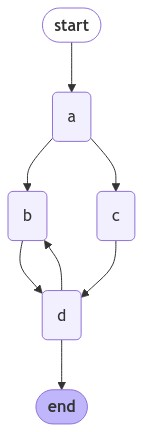

In [21]:

from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver


# langgraph.graph에서 StateGraph와 END를 가져옵니다.
workflow = StateGraph(State)

# Todo 를 작성합니다.
workflow.add_node("a", task_a)  # 에이전트 노드를 추가합니다.

# Todo 작업을 시작합니다.
workflow.add_node("b", task_b)

# 작업을 진행합니다.
workflow.add_node("c", task_c)

# 작업을 중간 체크합니다.
workflow.add_node("d", task_d)

# 각 노드들을 연결합니다.
workflow.add_edge(START, "a")
workflow.add_edge("a", "b")
workflow.add_edge("a", "c")
workflow.add_edge("b", "d")
workflow.add_edge("c", "d")
workflow.add_edge("d", "b")
workflow.add_edge("d", END)

# 그래프를 컴파일합니다.
app = workflow.compile()

# Visualize the Graph

from IPython.display import Image, display

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. 
       # xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass
